In [29]:
#Importaciones
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#conectar google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#traer documento
filename = '/content/drive/My Drive/cust_seg.csv'
df = pd.read_csv(filename)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [32]:
#Limpieza y procesamiento
print('Duplicados:', df.duplicated().sum())
print('Faltan:', df.isna().sum().sum())

Duplicados: 0
Faltan: 150


###PROCEDO A ELIMINAR UNNAMED, COLUMNA SIN NOMBRE Y EL ID DEL USUARIO, NO SON IMPORTANTES PARA EL ACTIVIDAD.

In [33]:
df.drop(columns = ['Unnamed: 0', 'Customer Id'], inplace = True)


In [34]:
# Verificar que fue dado de baja
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [35]:
# Mirar donde faltan los datos
print(df.isna().sum())
print()


Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64



In [36]:
#Rellenar de manera personal con el que más se repite o frecuente.
df['Defaulted'].fillna(0, inplace = True)

# Verificación
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [37]:
#mirar cuantos hay
df['Defaulted'].value_counts()

0.0    667
1.0    183
Name: Defaulted, dtype: int64

In [38]:
#Hcaer la estandarización de los datos
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

KMEANS

In [39]:
# Utilicen k-medias para crear diversos segmentos de los clientes.
inertias = []
silhouette_scores = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

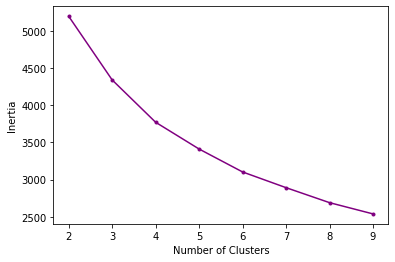

In [40]:
# GRAFICAR LAS INERCIAS
plt.plot(range(2, 10), inertias, color='purple', marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia');

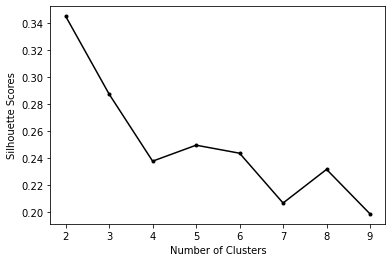

In [41]:
# Graficar las siluetas
plt.plot(range(2, 10), silhouette_scores, color='black', marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette Scores');

UNA NOS DICE QUE DEBO USAR DOS Y LA OTRA QUE TRES, VAMOS A VER QUIÉN TIENE LA RAZÓN

Elegí el presunto caso en un interés en los años de empleo, las deudas y la edad del usuario.

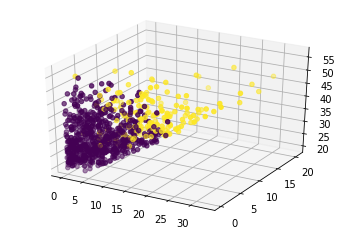

In [42]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
df['clusters'] = kmeans.labels_
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter(df['Years Employed'], df['Card Debt'], df['Age'], c = df['clusters'])

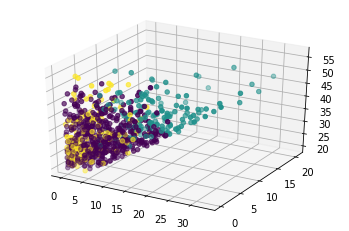

In [43]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)
df['clusters'] = kmeans.labels_
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter(df['Years Employed'], df['Card Debt'], df['Age'], c = df['clusters'])

###Aunque la silueta nos indica que deben ser dos, me parece que tres es más apegado a lo que nos dicen ambas gráficas de silueta e inercia.